ЗАДАНИЕ 3

In [71]:
import pandas  as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
from sklearn.model_selection import train_test_split
warnings.simplefilter("ignore")

In [72]:
movies = pd.read_excel('moviedb.xls')
movies
#Будем предсказывать рейтинг а в качаестве переменных это бюджет, сборы, длительность

,Unnamed: 0,title,release,runtime,budget,revenue,lang,genre1,genre2,country1,...,writer,studio1,studio2,keyword1,keyword2,keyword3,keyword4,keyword5,keyword6,rating
0,0,"""Vegeta"" (Shrek)",NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,1,'93: Del Soul,2021-07-18 00:00:00,15.0,250.0,NaN,en,детектив,триллер,NaN,...,Riley Lockhart,Elkman Productions,NaN,sports car,psychological stress,axe murder,horror filmmaking,1990s,carsploitation,2.0
2,2,'Catch Me If You Can': Behind the Camera,2003-05-06 00:00:00,17.0,NaN,NaN,NaN,документальный,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.7
3,3,'Harry Potter': Behind the Magic,2005-11-19 00:00:00,48.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
4,4,"'Oh, Miss Jones!': The Very Best of Leonard Ro...",1996-08-16 00:00:00,52.0,NaN,NaN,en,документальный,NaN,GB,...,NaN,Telegram,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10277,10277,Белфаст,2021-11-12 00:00:00,98.0,NaN,30000000.0,en,драма,NaN,GB,...,Kenneth Branagh,Northern Ireland Screen,TKBC,working class,black and white,"belfast, north ireland",1960s,NaN,NaN,7.2
10278,10278,Финч,2021-11-04 00:00:00,115.0,2500000.0,500000000.0,en,фантастика,драма,US,...,Ivor Powell,Amblin Entertainment,ImageMovers,robot,journey,humanity,post-apocalyptic,NaN,NaN,8.1
10279,10279,Под гипнозом,2021-10-27 00:00:00,88.0,NaN,NaN,en,триллер,драма,CA,...,Richard D'Ovidio,The Long Game,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.1
10280,10280,Последняя дуэль,2021-10-13 00:00:00,152.0,100000000.0,27000000.0,en,боевик,драма,GB,...,NaN,20th Century Studios,Scott Free Productions,based on novel or book,"normandy, france",based on true story,knight,duel,historical,7.6


In [73]:
df_budget = movies[['budget','rating']]
df_revenue = movies[['revenue','rating']]
df_runtime = movies[['runtime','rating']]
#теперь каждый набор данных "причесываем" если категориальное то заменяем на моду, если численное то на среднее
df_budget['budget']=df_budget['budget'].fillna(df_budget['budget'].mean())
df_revenue['revenue']=df_revenue['revenue'].fillna(df_revenue['revenue'].mean())
df_runtime['runtime']=df_runtime['runtime'].fillna(df_runtime['runtime'].mean())

df_budget['budget']= df_budget['budget'].astype('int64')
df_revenue['revenue'] = df_revenue['revenue'].astype('int64')
df_runtime['runtime'] = df_runtime['runtime'].astype('int64')
#и удаляем те строки где рейтинг nan таких строк 20
df_budget=df_budget.dropna(subset = ['rating'])
df_revenue=df_revenue.dropna(subset = ['rating'])
df_runtime=df_runtime.dropna(subset = ['rating'])

array_dfs = [df_budget,df_revenue,df_runtime]

In [77]:
for i in array_dfs:
    model = LinearRegression()
    X = i.iloc[:,0].to_numpy()
    Y = i['rating'].to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.3, random_state=42)
    model.fit(X_train.reshape(-1, 1),y_train.reshape(-1, 1))
    y_pred_train = model.predict(X_train.reshape(-1, 1))
    y_pred_test = model.predict(X_test.reshape(-1, 1))
    r2_train = r2_score(y_train.reshape(-1, 1),y_pred_train)
    r2_test = r2_score(y_test.reshape(-1, 1),y_pred_test)
    print('Тренировочный - ',r2_train,'\tТестовый - ',r2_test)

Тренировочный -  0.0013349457429203682 	Тестовый -  0.0009186834595958926
Тренировочный -  0.002372115018185683 	Тестовый -  0.0013978383424291252
Тренировочный -  0.22342681820050236 	Тестовый -  0.22544860594980654


В нашем случае лучший r2 дает модель которая обучалась на длительности фильма

Задание 1

In [62]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay,roc_curve, auc,roc_auc_score


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Данные - 


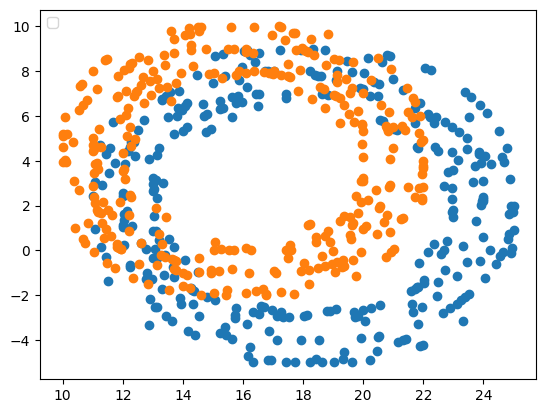

Полнота - 1.0, точность - 1.0, f1 - 1.0 для тренировочных
Полнота - 0.78125, точность - 0.847457627118644, f1 - 0.8130081300813008 для тестовых
Матрица расхождений для тренировочных
Матрица расхождений для тестовых


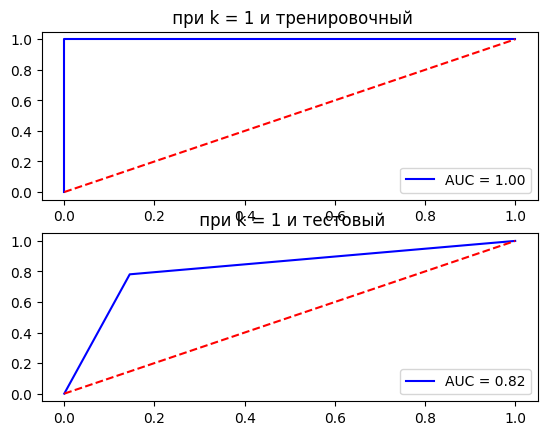

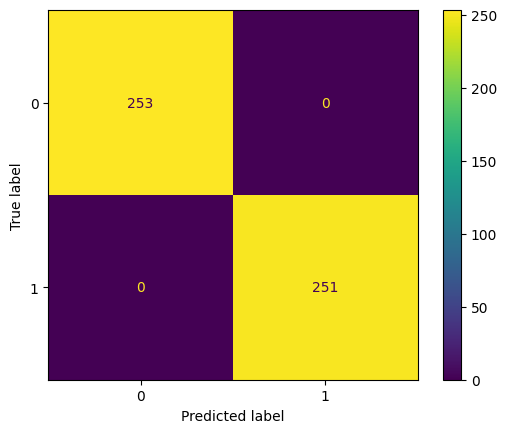

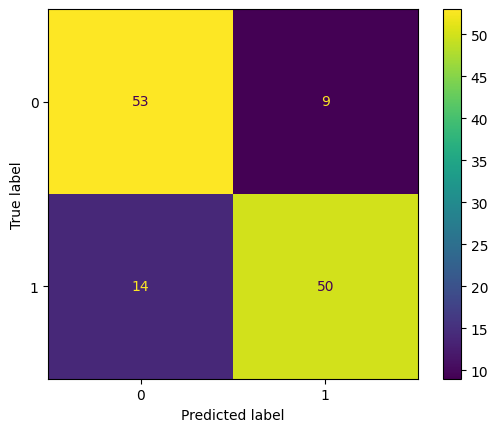

Полнота - 0.7848605577689243, точность - 1.0, f1 - 0.8794642857142857 для тренировочных
Полнота - 0.671875, точность - 0.86, f1 - 0.7543859649122807 для тестовых
Матрица расхождений для тренировочных
Матрица расхождений для тестовых


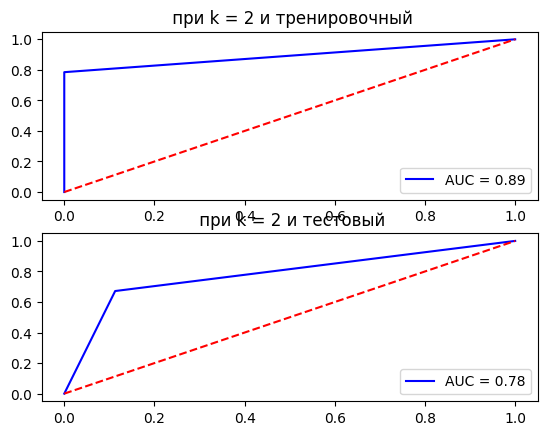

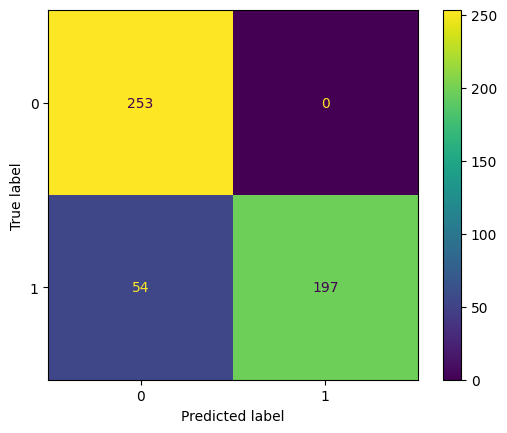

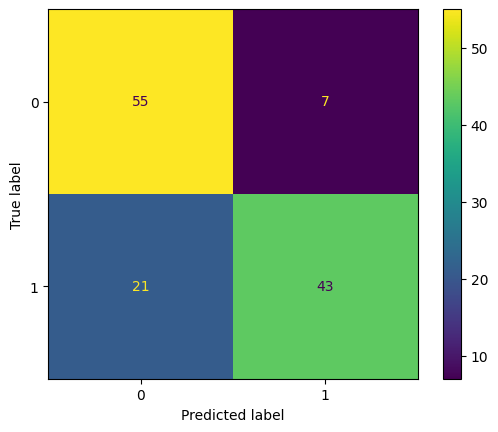

Полнота - 0.8725099601593626, точность - 0.8902439024390244, f1 - 0.8812877263581489 для тренировочных
Полнота - 0.8125, точность - 0.7647058823529411, f1 - 0.787878787878788 для тестовых
Матрица расхождений для тренировочных
Матрица расхождений для тестовых


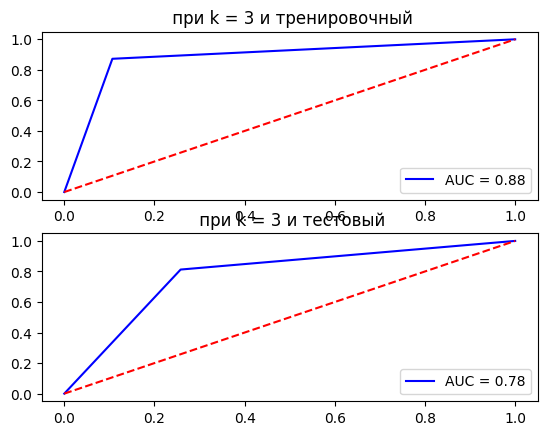

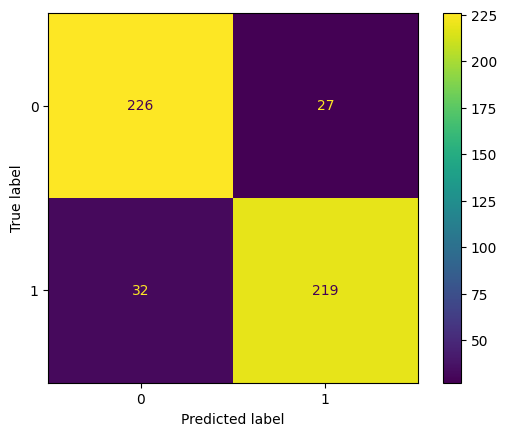

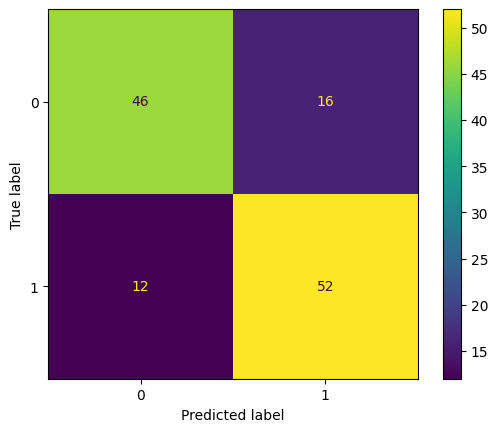

Полнота - 0.7768924302788844, точность - 0.9285714285714286, f1 - 0.8459869848156182 для тренировочных
Полнота - 0.703125, точность - 0.8181818181818182, f1 - 0.7563025210084033 для тестовых
Матрица расхождений для тренировочных
Матрица расхождений для тестовых


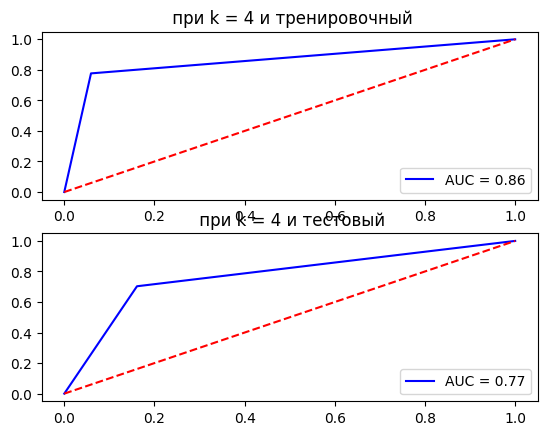

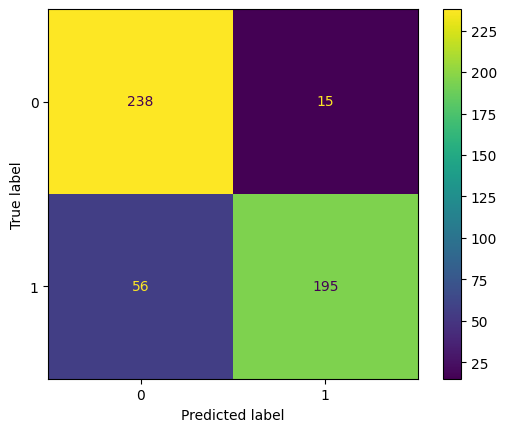

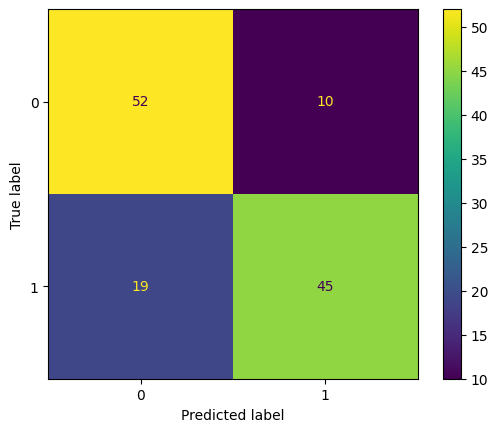

Полнота - 0.8804780876494024, точность - 0.8565891472868217, f1 - 0.8683693516699411 для тренировочных
Полнота - 0.828125, точность - 0.7794117647058824, f1 - 0.8030303030303031 для тестовых
Матрица расхождений для тренировочных
Матрица расхождений для тестовых


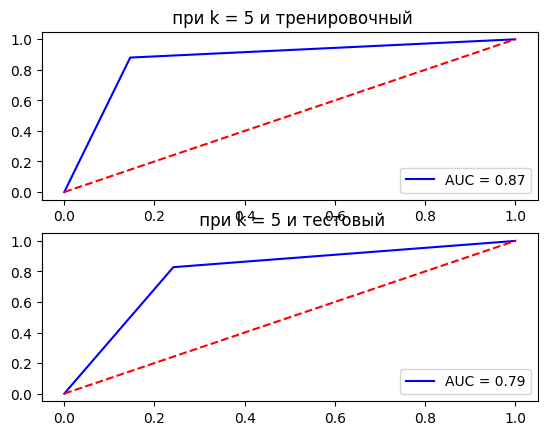

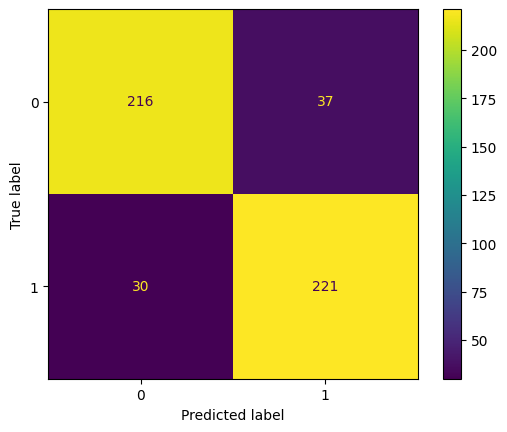

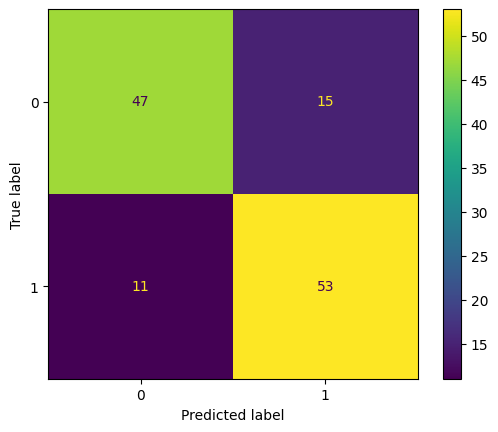

Полнота - 0.7848605577689243, точность - 0.8914027149321267, f1 - 0.8347457627118644 для тренировочных
Полнота - 0.765625, точность - 0.8166666666666667, f1 - 0.7903225806451613 для тестовых
Матрица расхождений для тренировочных
Матрица расхождений для тестовых


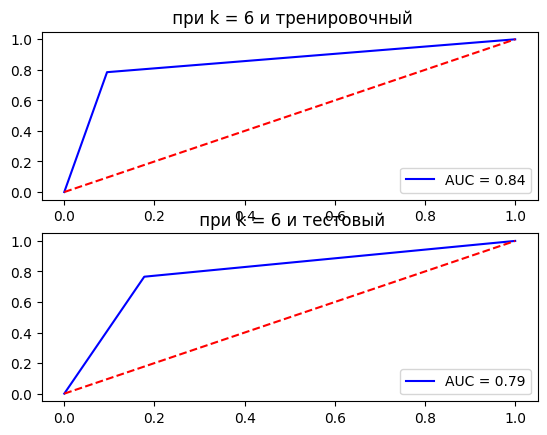

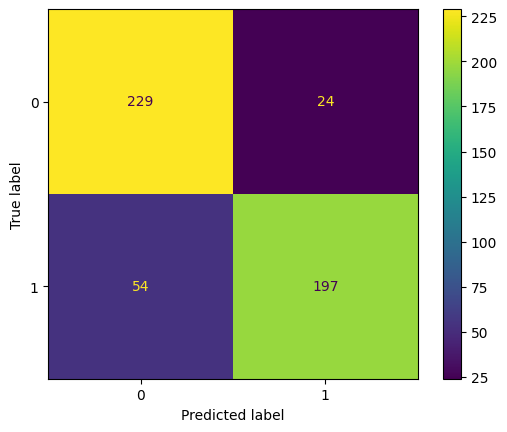

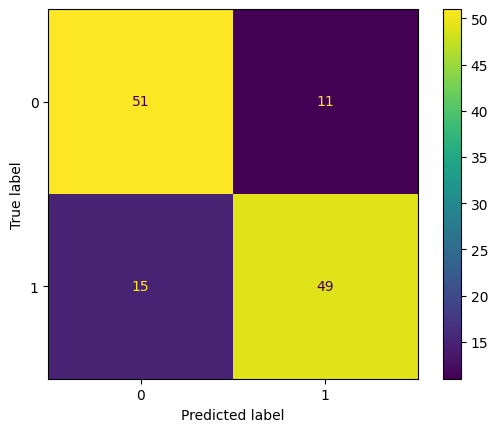

Полнота - 0.848605577689243, точность - 0.8554216867469879, f1 - 0.852 для тренировочных
Полнота - 0.8125, точность - 0.8, f1 - 0.8062015503875969 для тестовых
Матрица расхождений для тренировочных
Матрица расхождений для тестовых


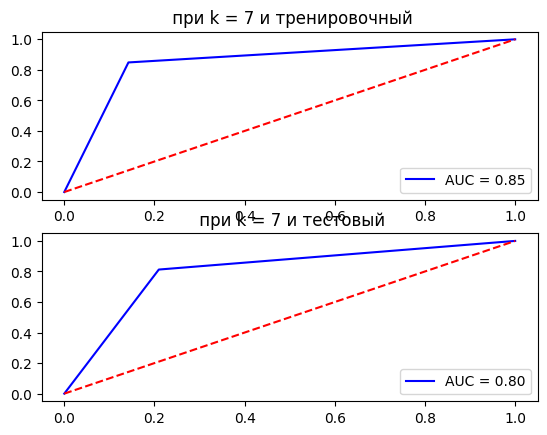

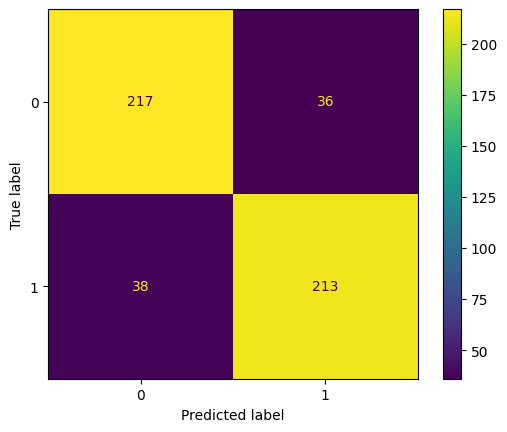

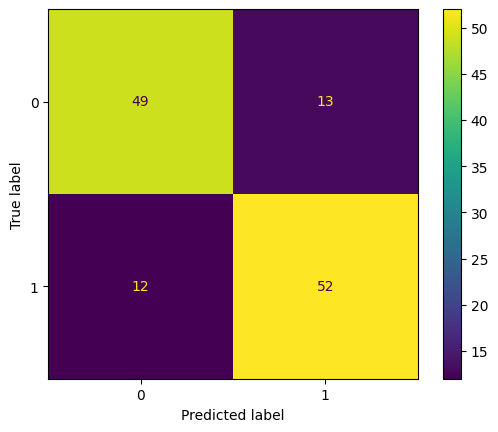

Полнота - 0.7729083665338645, точность - 0.8940092165898618, f1 - 0.829059829059829 для тренировочных
Полнота - 0.71875, точность - 0.8214285714285714, f1 - 0.7666666666666666 для тестовых
Матрица расхождений для тренировочных
Матрица расхождений для тестовых


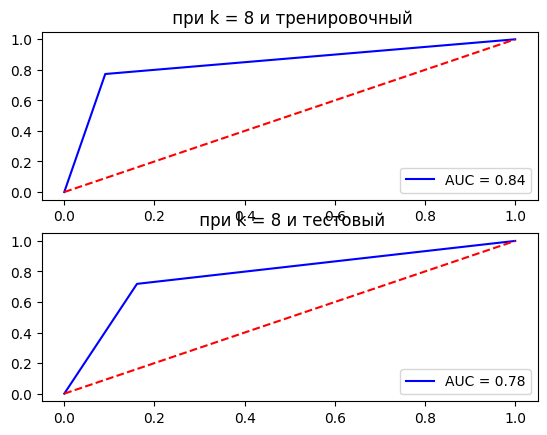

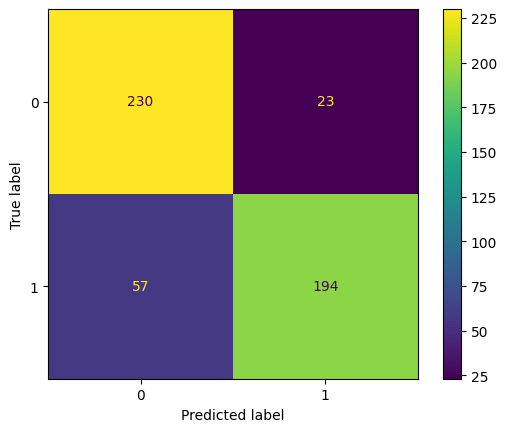

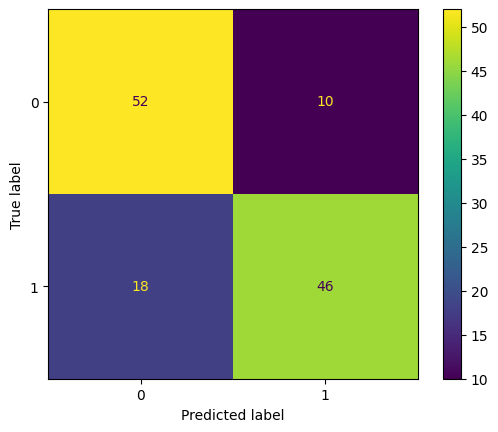

In [81]:
df1 = pd.DataFrame(columns=['X','Y','class'])
a1 = random.randint(1,20)
b1 = random.randint(1,20)
r1 = random.randint(1,10)

a2 = random.randint(1,20)
b2 = random.randint(1,20)
r2 = random.randint(1,10)

stepSize = 0.1

positions_first_class = []
positions_second_class = []
t = 0
x1=[]
x2=[]
y1=[]
y2=[]
while t <10 * math.pi:
    x1.append(r1 * math.cos(t) + a1+random.randint(-1,1))
    y1.append(r1 * math.sin(t) + b1+random.randint(-1,1))
    x2.append(r2 * math.cos(t) + a2+random.randint(-1,1))
    y2.append(r2 * math.sin(t) + b2+random.randint(-1,1))
    t += stepSize
print('Данные - ')
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x1, y1)
ax1.scatter(x2,y2)
plt.show()


for i in range(len(x1)):
    df1.loc[len(df1)] = [x1[i],y1[i],0]
    df1.loc[len(df1)] = [x2[i],y2[i],1]
df1=df1.reindex(np.random.permutation(df1.index))#перемешать данные в нашем наборе
df1['class']=df1['class'].astype(int)
X = df1[['X','Y']]
Y = df1['class']
X_train, X_test, y_train, y_test = train_test_split(
     X, Y, test_size=0.2)
for k in range(1,9):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    predict_train = neigh.predict(X_train)
    predict_test = neigh.predict(X_test)
    lr_auc_train = roc_auc_score(y_train, predict_train)
    lr_auc_test = roc_auc_score(y_test, predict_test)
    fpr_train, tpr_train, treshold_train = roc_curve(y_train, predict_train)
    fpr_test, tpr_test, treshold_test = roc_curve(y_test, predict_test)
    roc_auc_train = auc(fpr_train, tpr_train)
    roc_auc_test = auc(fpr_test, tpr_test)
    fig, axs = plt.subplots(2)
    axs[0].plot(fpr_train, tpr_train, 'b', label = 'AUC = %0.2f' % roc_auc_train)
    axs[0].legend(loc = 'lower right')
    axs[0].plot([0, 1], [0, 1],'r--')
    axs[0].set_title(f' при k = {k} и тренировочный')
    # axs[1,].sharex(axs[0])
    axs[1].plot(fpr_test, tpr_test, 'b', label = 'AUC = %0.2f' % roc_auc_test)
    axs[1].legend(loc = 'lower right')
    axs[1].plot([0, 1], [0, 1],'r--')
    axs[1].set_title(f' при k = {k} и тестовый')
    print(f'Полнота - {recall_score(y_train,predict_train)}, точность - {precision_score(y_train,predict_train)}, f1 - {f1_score(y_train,predict_train)} для тренировочных')
    print(f'Полнота - {recall_score(y_test,predict_test)}, точность - {precision_score(y_test,predict_test)}, f1 - {f1_score(y_test,predict_test)} для тестовых')
    print('Матрица расхождений для тренировочных')
    print('Матрица расхождений для тестовых')
    cm = confusion_matrix(y_train,predict_train, labels=neigh.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=neigh.classes_)
    disp.plot()
    cm1 = confusion_matrix(y_test,predict_test, labels=neigh.classes_)
    disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1,
                              display_labels=neigh.classes_)
    disp1.plot()
    plt.show()
# под графиком точности я понял как roc_auc кривая 

Данные - 


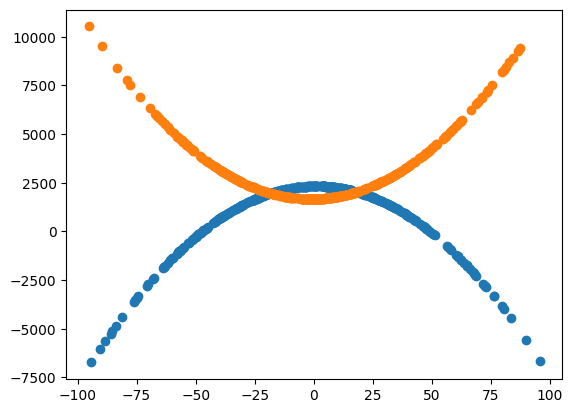

Полнота - 1.0, точность - 1.0, f1 - 1.0 для тренировочных
Полнота - 0.8809523809523809, точность - 0.961038961038961, f1 - 0.9192546583850931 для тестовых
Матрица расхождений для тренировочных
Матрица расхождений для тестовых


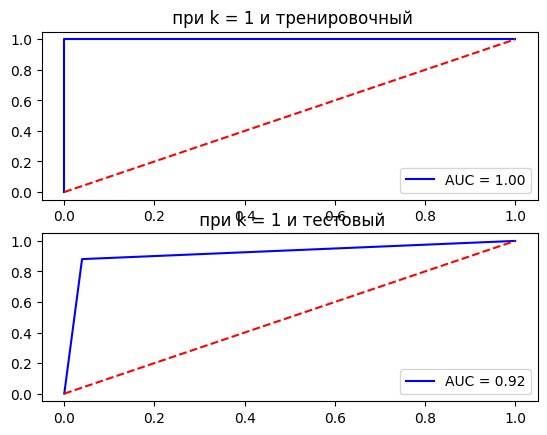

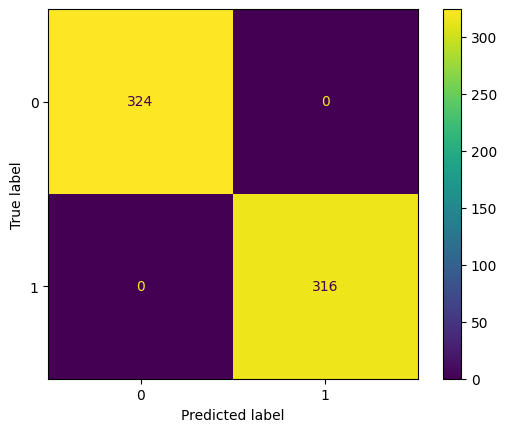

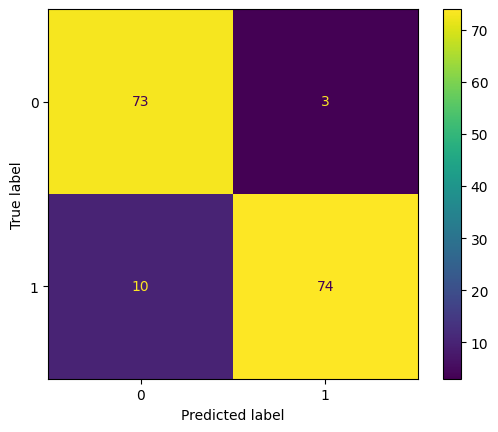

Полнота - 0.9272151898734177, точность - 1.0, f1 - 0.9622331691297208 для тренировочных
Полнота - 0.7976190476190477, точность - 0.9710144927536232, f1 - 0.8758169934640523 для тестовых
Матрица расхождений для тренировочных
Матрица расхождений для тестовых


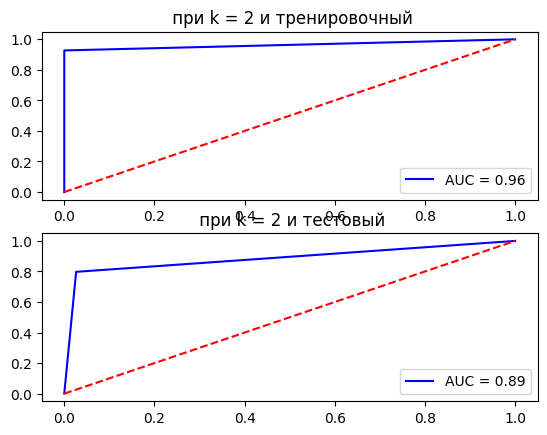

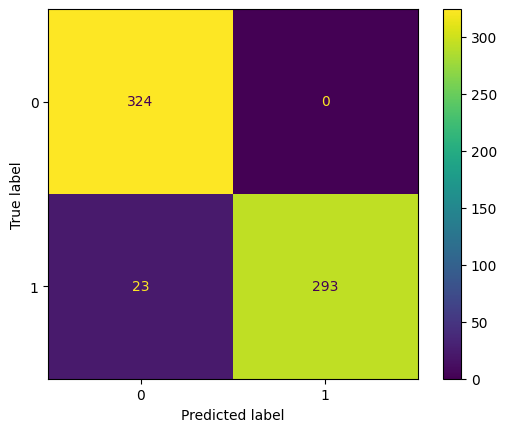

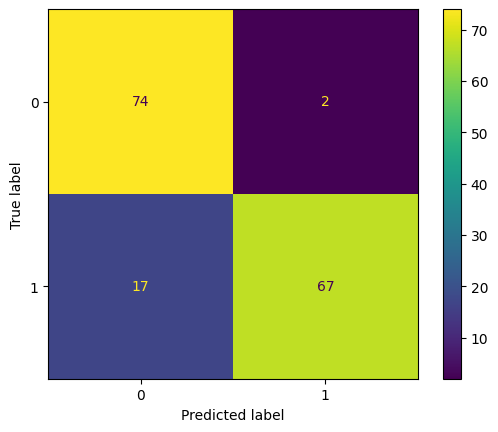

Полнота - 0.9620253164556962, точность - 0.9589905362776026, f1 - 0.9605055292259085 для тренировочных
Полнота - 0.8928571428571429, точность - 0.9146341463414634, f1 - 0.9036144578313253 для тестовых
Матрица расхождений для тренировочных
Матрица расхождений для тестовых


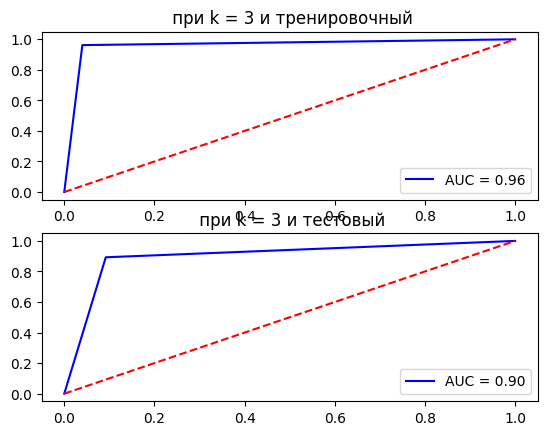

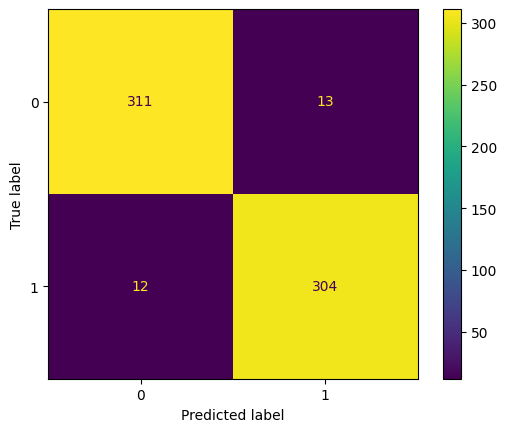

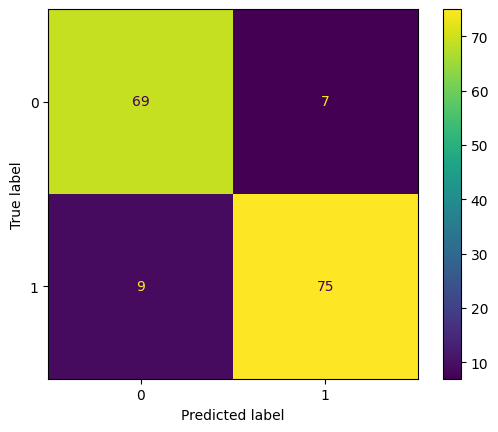

Полнота - 0.8734177215189873, точность - 0.971830985915493, f1 - 0.92 для тренировочных
Полнота - 0.7738095238095238, точность - 0.9420289855072463, f1 - 0.849673202614379 для тестовых
Матрица расхождений для тренировочных
Матрица расхождений для тестовых


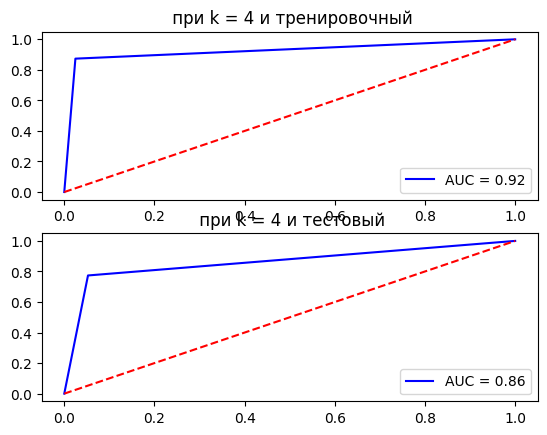

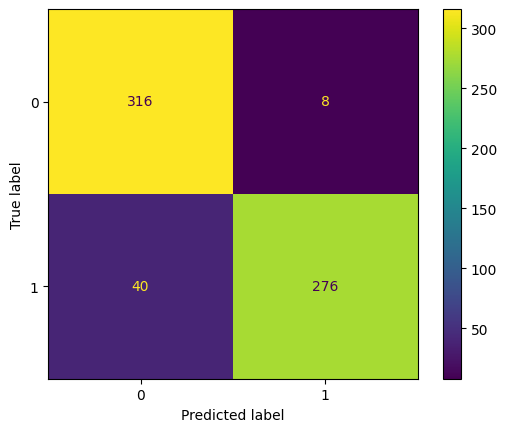

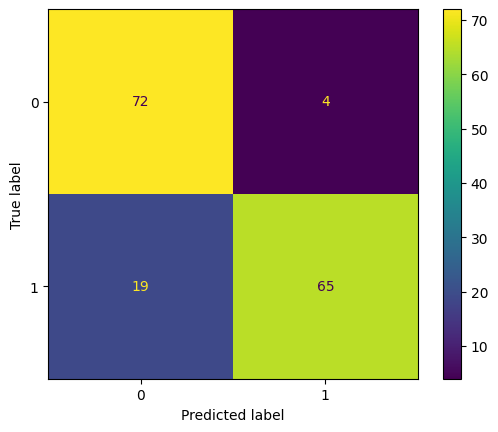

Полнота - 0.9018987341772152, точность - 0.95, f1 - 0.9253246753246753 для тренировочных
Полнота - 0.7976190476190477, точность - 0.9054054054054054, f1 - 0.8481012658227848 для тестовых
Матрица расхождений для тренировочных
Матрица расхождений для тестовых


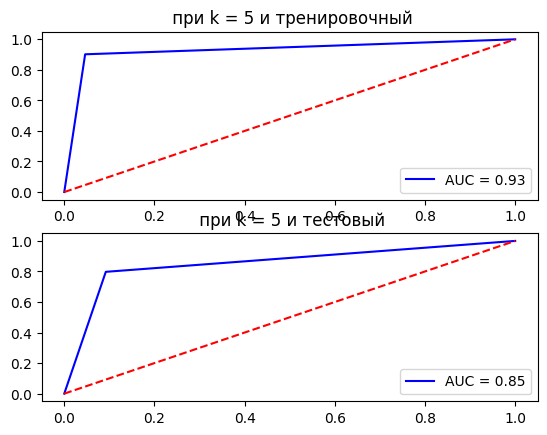

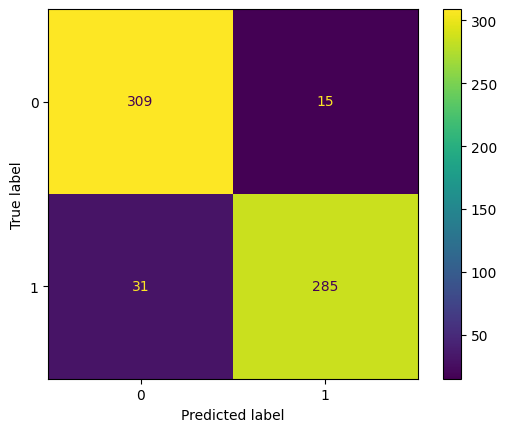

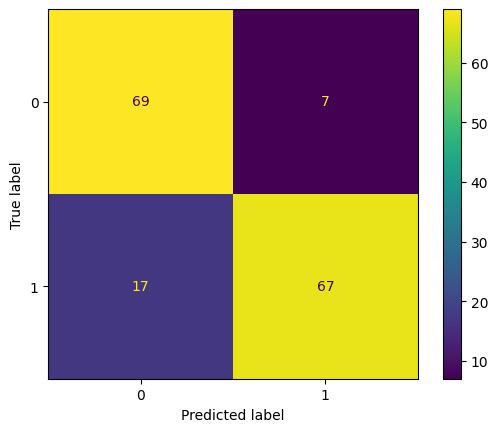

Полнота - 0.8607594936708861, точность - 0.9577464788732394, f1 - 0.9066666666666667 для тренировочных
Полнота - 0.7738095238095238, точность - 0.9420289855072463, f1 - 0.849673202614379 для тестовых
Матрица расхождений для тренировочных
Матрица расхождений для тестовых


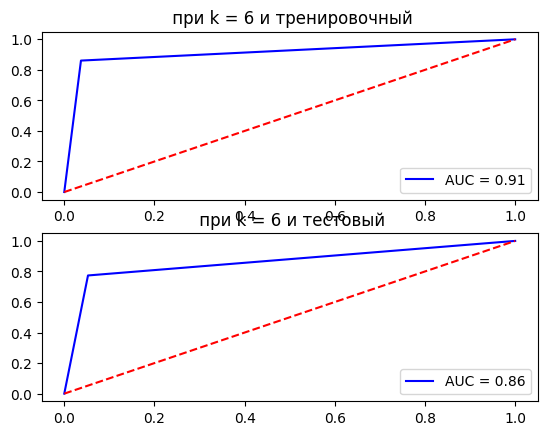

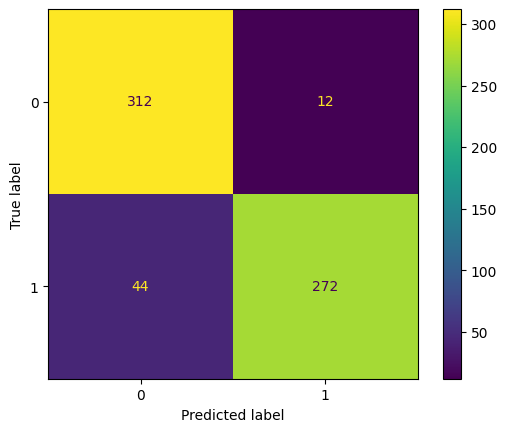

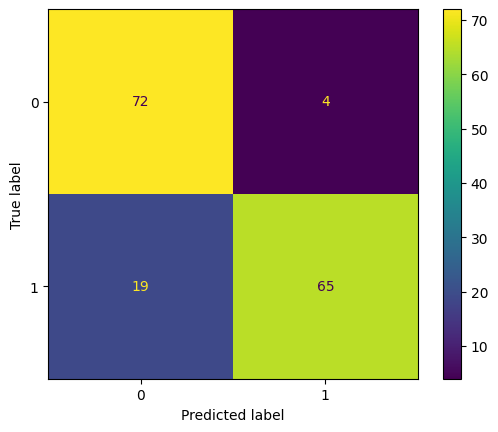

Полнота - 0.8924050632911392, точность - 0.9215686274509803, f1 - 0.9067524115755626 для тренировочных
Полнота - 0.7857142857142857, точность - 0.9295774647887324, f1 - 0.8516129032258065 для тестовых
Матрица расхождений для тренировочных
Матрица расхождений для тестовых


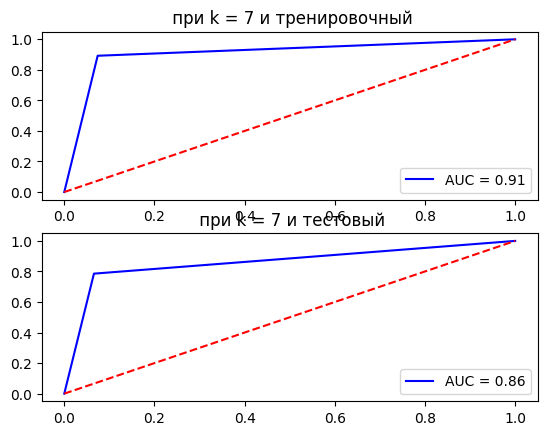

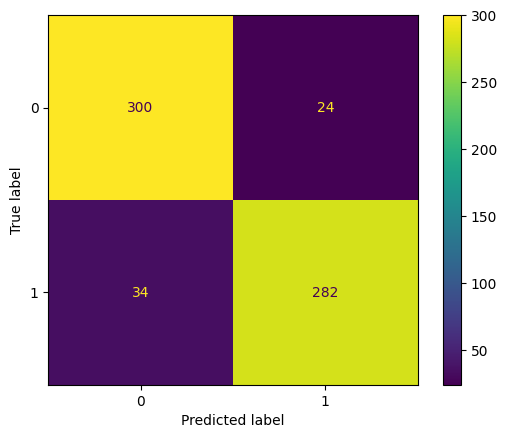

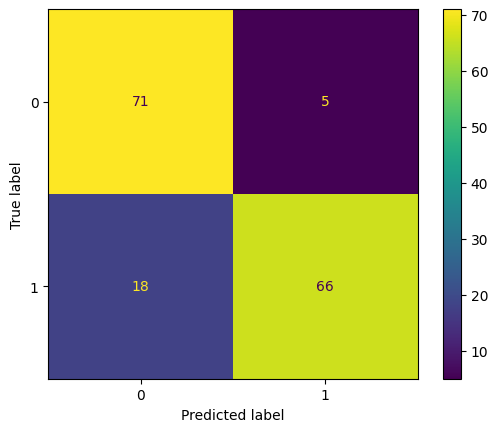

Полнота - 0.8765822784810127, точность - 0.9295302013422819, f1 - 0.9022801302931597 для тренировочных
Полнота - 0.7738095238095238, точность - 0.9420289855072463, f1 - 0.849673202614379 для тестовых
Матрица расхождений для тренировочных
Матрица расхождений для тестовых


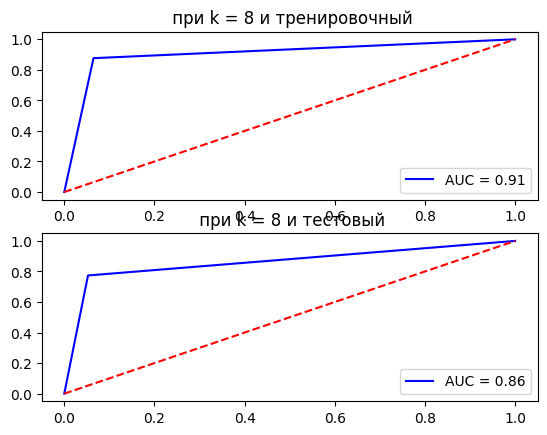

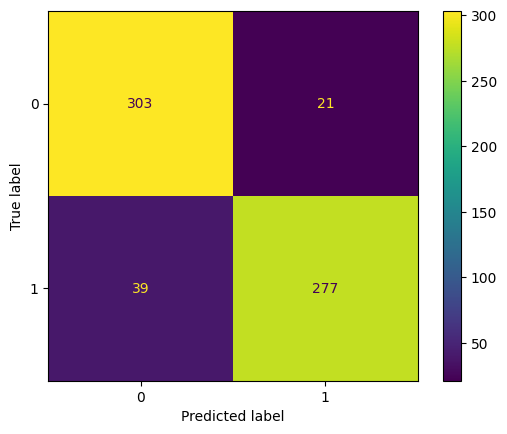

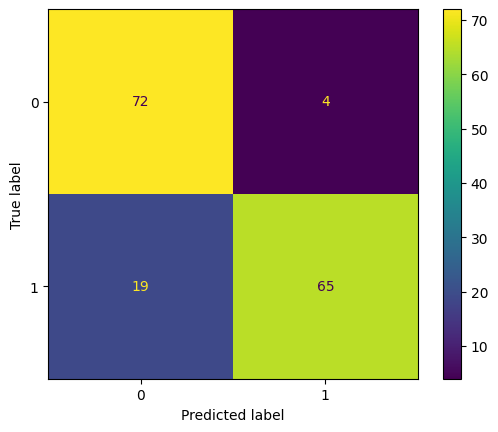

In [104]:
df1 = pd.DataFrame(columns=['X','Y','class'])



positions_first_class = []
positions_second_class = []
t = 0
x1=[]
x2=[]
y1=[]
y2=[]
c1 = random.randint(-3000,3000)
c2 = random.randint(-3000,3000)
while t <400:
    x1_point = random.uniform(random.randint(-100,0),random.randint(0,100))
    
    x2_point = random.uniform(random.randint(-100,0),random.randint(0,100))
    
    x1.append(x1_point)
    y1.append(-x1_point**2+2*x1_point+c1)
    x2.append(x2_point)
    y2.append(x2_point**2+2*x2_point+c2)
    t += 1
print('Данные - ')
fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.scatter(x1, y1)
ax1.scatter(x2,y2)
plt.show()


for i in range(len(x1)):
    df1.loc[len(df1)] = [x1[i],y1[i],0]
    df1.loc[len(df1)] = [x2[i],y2[i],1]
df1=df1.reindex(np.random.permutation(df1.index))#перемешать данные в нашем наборе
df1['class']=df1['class'].astype(int)
X = df1[['X','Y']]
Y = df1['class']
X_train, X_test, y_train, y_test = train_test_split(
     X, Y, test_size=0.2)
for k in range(1,9):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    predict_train = neigh.predict(X_train)
    predict_test = neigh.predict(X_test)
    lr_auc_train = roc_auc_score(y_train, predict_train)
    lr_auc_test = roc_auc_score(y_test, predict_test)
    fpr_train, tpr_train, treshold_train = roc_curve(y_train, predict_train)
    fpr_test, tpr_test, treshold_test = roc_curve(y_test, predict_test)
    roc_auc_train = auc(fpr_train, tpr_train)
    roc_auc_test = auc(fpr_test, tpr_test)
    fig, axs = plt.subplots(2)
    axs[0].plot(fpr_train, tpr_train, 'b', label = 'AUC = %0.2f' % roc_auc_train)
    axs[0].legend(loc = 'lower right')
    axs[0].plot([0, 1], [0, 1],'r--')
    axs[0].set_title(f' при k = {k} и тренировочный')
    # axs[1,].sharex(axs[0])
    axs[1].plot(fpr_test, tpr_test, 'b', label = 'AUC = %0.2f' % roc_auc_test)
    axs[1].legend(loc = 'lower right')
    axs[1].plot([0, 1], [0, 1],'r--')
    axs[1].set_title(f' при k = {k} и тестовый')
    print(f'Полнота - {recall_score(y_train,predict_train)}, точность - {precision_score(y_train,predict_train)}, f1 - {f1_score(y_train,predict_train)} для тренировочных')
    print(f'Полнота - {recall_score(y_test,predict_test)}, точность - {precision_score(y_test,predict_test)}, f1 - {f1_score(y_test,predict_test)} для тестовых')
    print('Матрица расхождений для тренировочных')
    print('Матрица расхождений для тестовых')
    cm = confusion_matrix(y_train,predict_train, labels=neigh.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=neigh.classes_)
    disp.plot()
    cm1 = confusion_matrix(y_test,predict_test, labels=neigh.classes_)
    disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1,
                              display_labels=neigh.classes_)
    disp1.plot()
    plt.show()
# под графиком точности я понял как roc_auc кривая 

Данные - 


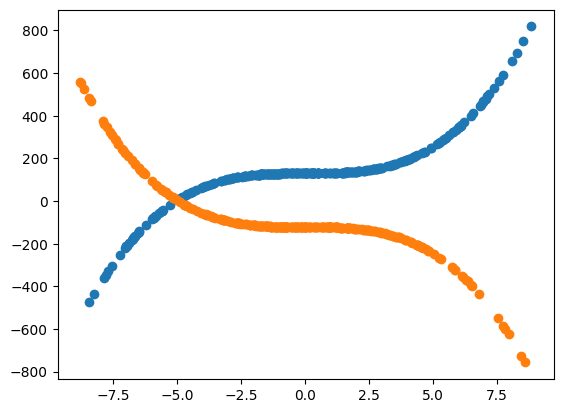

Полнота - 1.0, точность - 1.0, f1 - 1.0 для тренировочных
Полнота - 0.8870967741935484, точность - 0.9166666666666666, f1 - 0.9016393442622951 для тестовых
Матрица расхождений для тренировочных
Матрица расхождений для тестовых


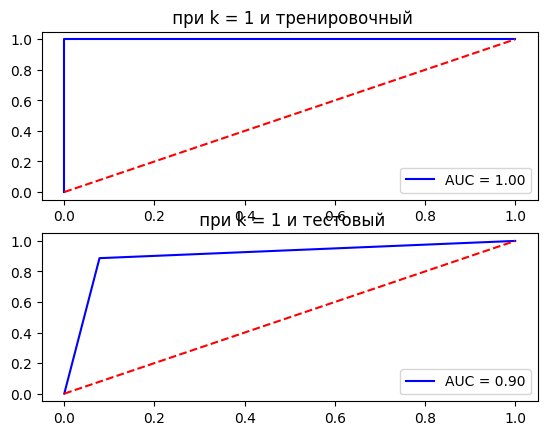

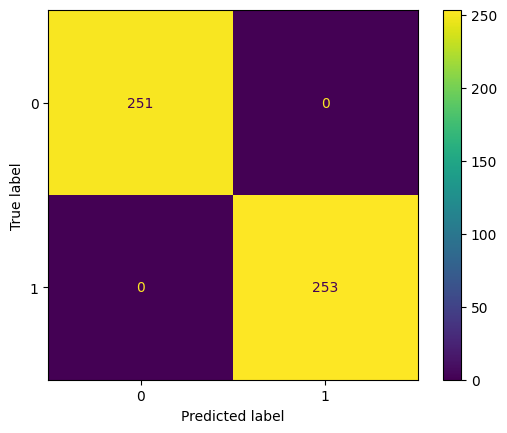

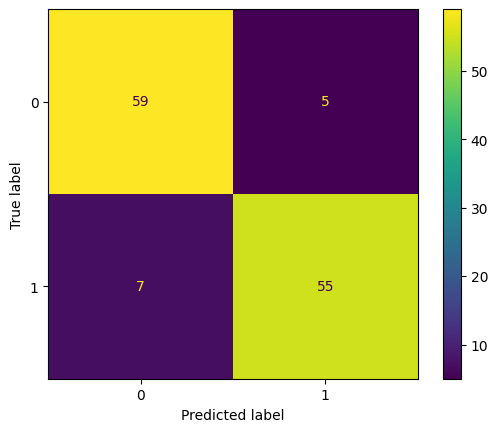

Полнота - 0.9090909090909091, точность - 1.0, f1 - 0.9523809523809523 для тренировочных
Полнота - 0.7903225806451613, точность - 0.98, f1 - 0.8749999999999999 для тестовых
Матрица расхождений для тренировочных
Матрица расхождений для тестовых


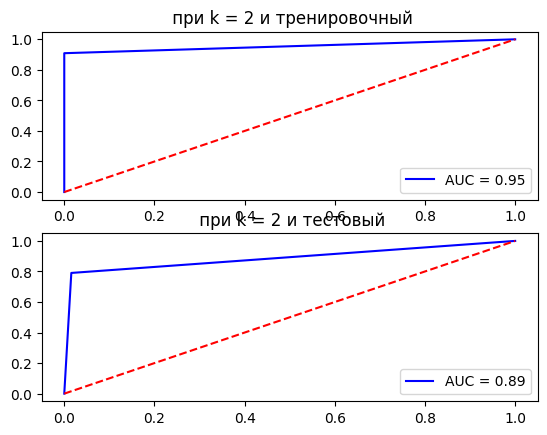

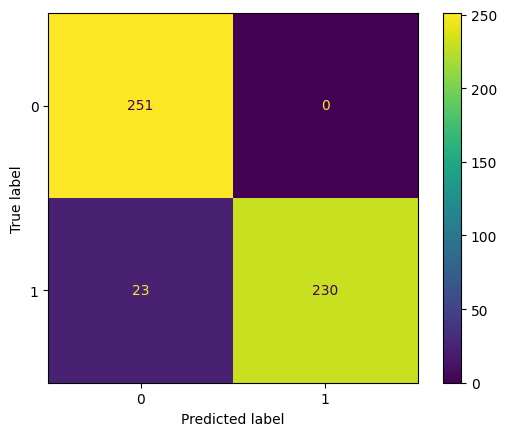

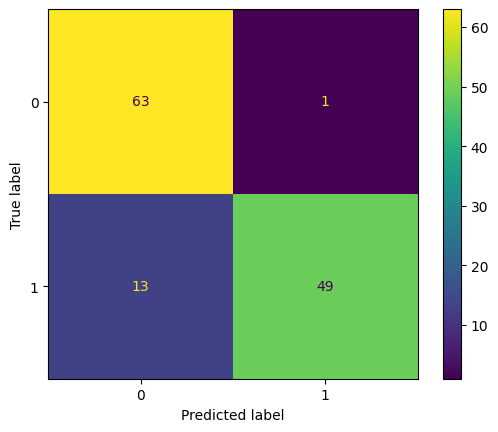

Полнота - 0.9525691699604744, точность - 0.9450980392156862, f1 - 0.9488188976377954 для тренировочных
Полнота - 0.8387096774193549, точность - 0.8813559322033898, f1 - 0.859504132231405 для тестовых
Матрица расхождений для тренировочных
Матрица расхождений для тестовых


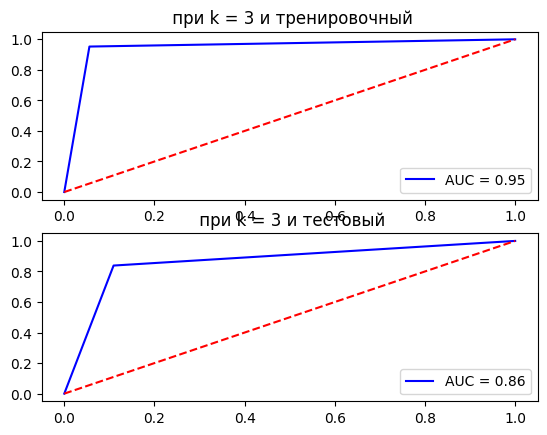

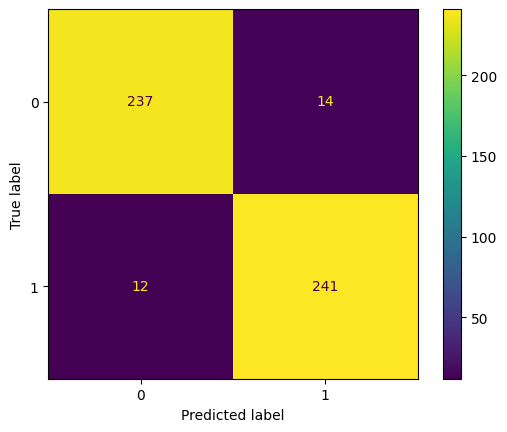

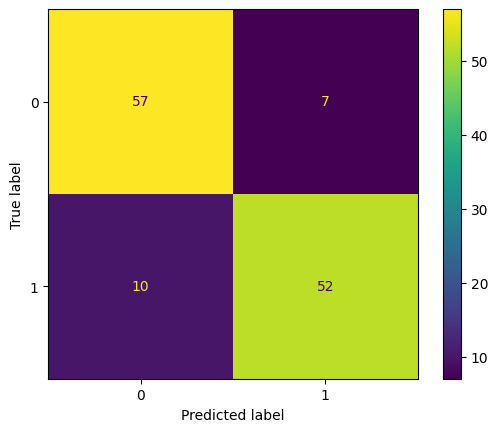

Полнота - 0.8774703557312253, точность - 0.961038961038961, f1 - 0.9173553719008266 для тренировочных
Полнота - 0.8064516129032258, точность - 0.9615384615384616, f1 - 0.8771929824561403 для тестовых
Матрица расхождений для тренировочных
Матрица расхождений для тестовых


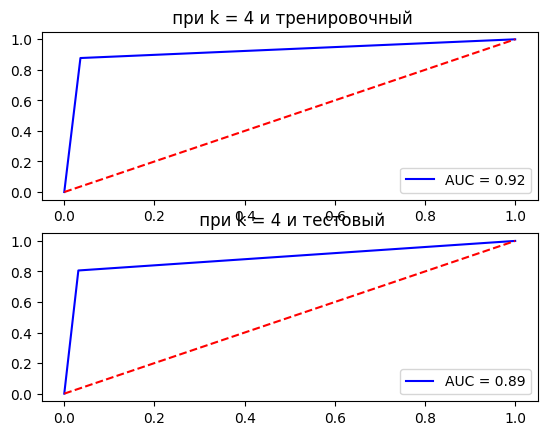

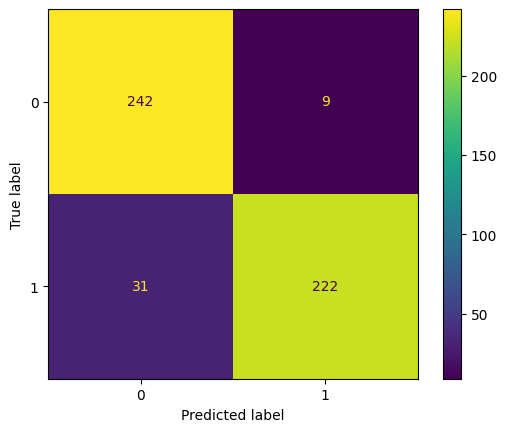

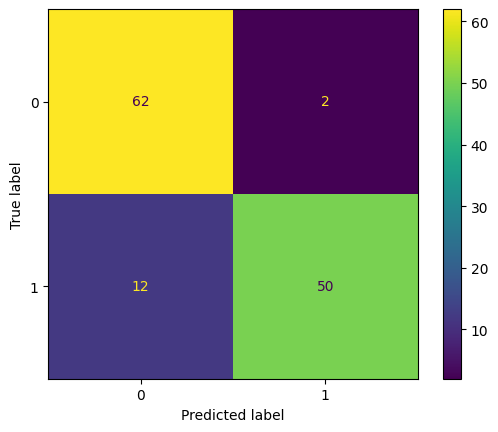

Полнота - 0.9209486166007905, точность - 0.9282868525896414, f1 - 0.9246031746031745 для тренировочных
Полнота - 0.8225806451612904, точность - 0.9107142857142857, f1 - 0.864406779661017 для тестовых
Матрица расхождений для тренировочных
Матрица расхождений для тестовых


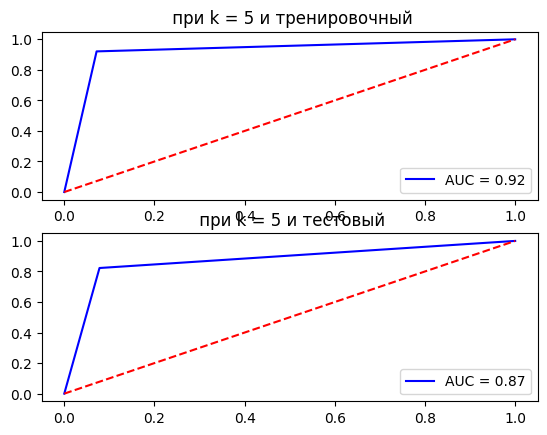

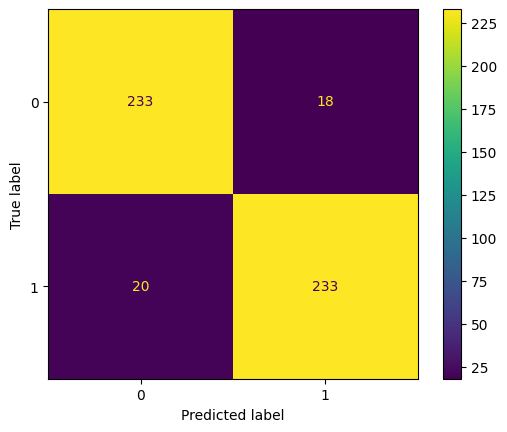

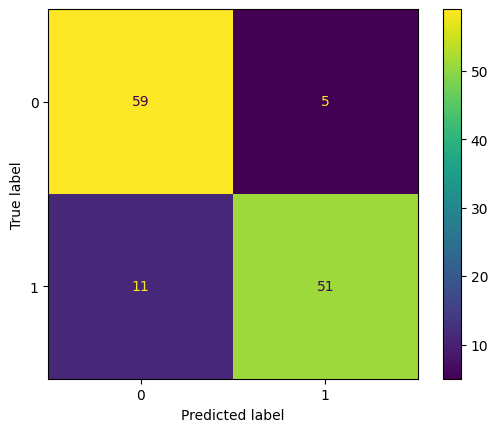

Полнота - 0.8695652173913043, точность - 0.9523809523809523, f1 - 0.909090909090909 для тренировочных
Полнота - 0.8225806451612904, точность - 0.9807692307692307, f1 - 0.8947368421052632 для тестовых
Матрица расхождений для тренировочных
Матрица расхождений для тестовых


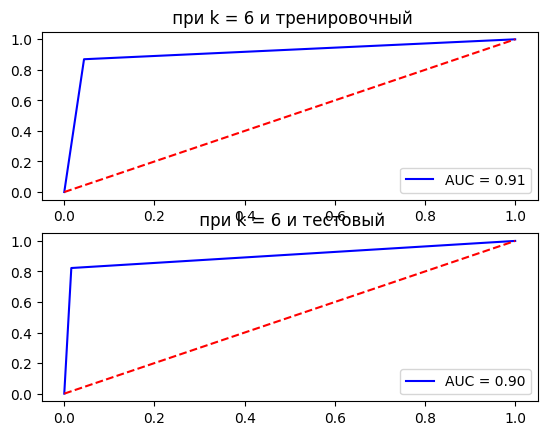

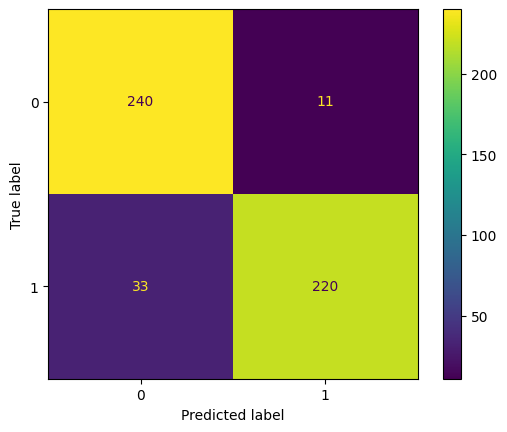

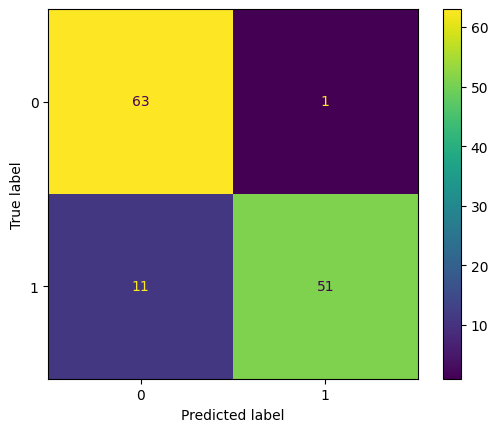

Полнота - 0.8972332015810277, точность - 0.8937007874015748, f1 - 0.8954635108481263 для тренировочных
Полнота - 0.8548387096774194, точность - 0.8688524590163934, f1 - 0.8617886178861789 для тестовых
Матрица расхождений для тренировочных
Матрица расхождений для тестовых


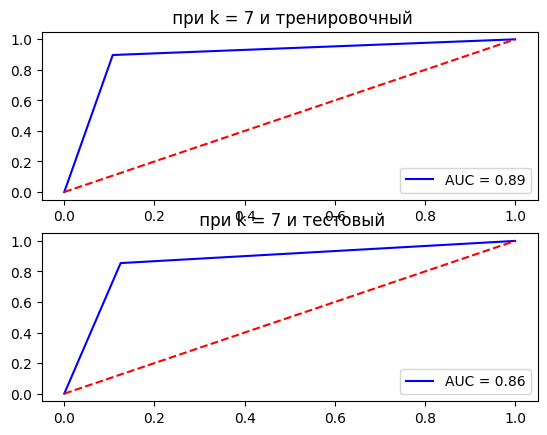

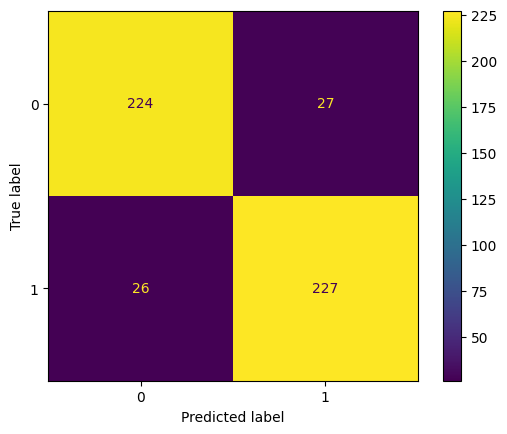

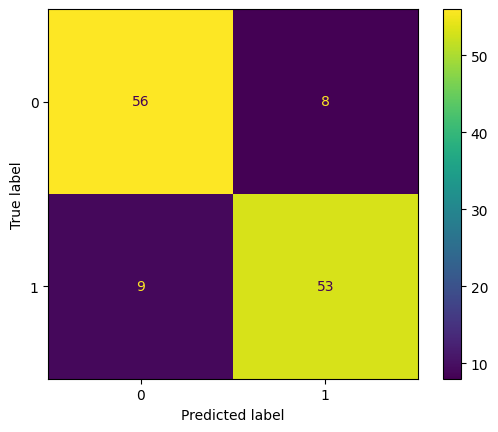

Полнота - 0.8656126482213439, точность - 0.9087136929460581, f1 - 0.8866396761133603 для тренировочных
Полнота - 0.8225806451612904, точность - 0.9272727272727272, f1 - 0.8717948717948718 для тестовых
Матрица расхождений для тренировочных
Матрица расхождений для тестовых


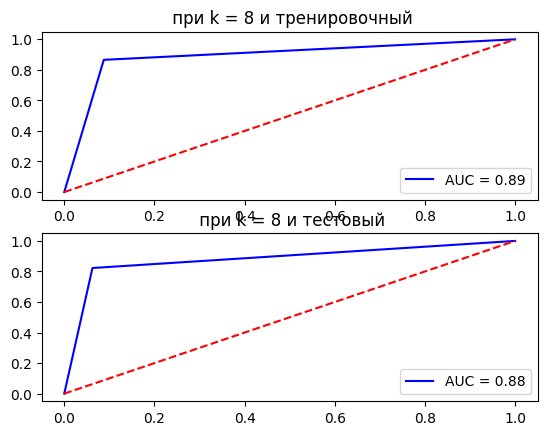

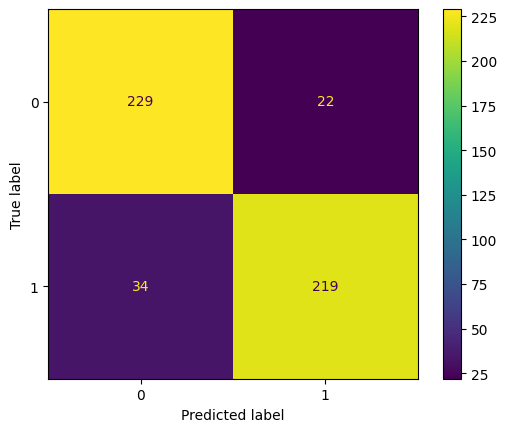

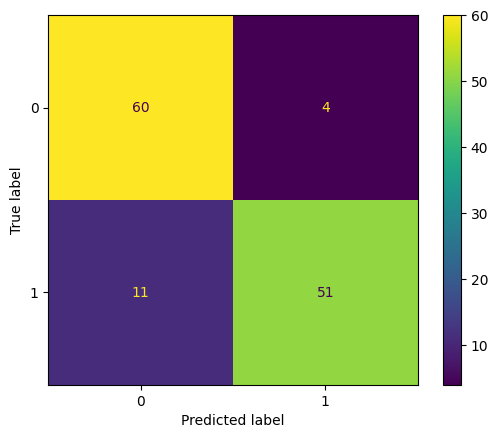

In [111]:
df1 = pd.DataFrame(columns=['X','Y','class'])
a1 = random.randint(1,20)
b1 = random.randint(1,20)
r1 = random.randint(1,10)

a2 = random.randint(1,20)
b2 = random.randint(1,20)
r2 = random.randint(1,10)

stepSize = 0.1

positions_first_class = []
positions_second_class = []
t = 0
x1=[]
x2=[]
y1=[]
y2=[]
c1 = random.randint(-100,100)
c2 = random.randint(-100,100)
while t <10 * math.pi:

    x1_point = random.uniform(random.randint(-9,0),random.randint(0,9))
    
    x2_point = random.uniform(random.randint(-9,0),random.randint(0,9))

    x1.append(x1_point)
    y1.append(math.pow(x1_point,3)+c1*2)
    x2.append(x2_point)
    y2.append(-math.pow(x2_point,3)+c2*2)
    t += stepSize
print('Данные - ')
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x1, y1)
ax1.scatter(x2,y2)
plt.show()


for i in range(len(x1)):
    df1.loc[len(df1)] = [x1[i],y1[i],0]
    df1.loc[len(df1)] = [x2[i],y2[i],1]
df1=df1.reindex(np.random.permutation(df1.index))#перемешать данные в нашем наборе
df1['class']=df1['class'].astype(int)
X = df1[['X','Y']]
Y = df1['class']
X_train, X_test, y_train, y_test = train_test_split(
     X, Y, test_size=0.2)
for k in range(1,9):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    predict_train = neigh.predict(X_train)
    predict_test = neigh.predict(X_test)
    lr_auc_train = roc_auc_score(y_train, predict_train)
    lr_auc_test = roc_auc_score(y_test, predict_test)
    fpr_train, tpr_train, treshold_train = roc_curve(y_train, predict_train)
    fpr_test, tpr_test, treshold_test = roc_curve(y_test, predict_test)
    roc_auc_train = auc(fpr_train, tpr_train)
    roc_auc_test = auc(fpr_test, tpr_test)
    fig, axs = plt.subplots(2)
    axs[0].plot(fpr_train, tpr_train, 'b', label = 'AUC = %0.2f' % roc_auc_train)
    axs[0].legend(loc = 'lower right')
    axs[0].plot([0, 1], [0, 1],'r--')
    axs[0].set_title(f' при k = {k} и тренировочный')
    # axs[1,].sharex(axs[0])
    axs[1].plot(fpr_test, tpr_test, 'b', label = 'AUC = %0.2f' % roc_auc_test)
    axs[1].legend(loc = 'lower right')
    axs[1].plot([0, 1], [0, 1],'r--')
    axs[1].set_title(f' при k = {k} и тестовый')
    print(f'Полнота - {recall_score(y_train,predict_train)}, точность - {precision_score(y_train,predict_train)}, f1 - {f1_score(y_train,predict_train)} для тренировочных')
    print(f'Полнота - {recall_score(y_test,predict_test)}, точность - {precision_score(y_test,predict_test)}, f1 - {f1_score(y_test,predict_test)} для тестовых')
    print('Матрица расхождений для тренировочных')
    print('Матрица расхождений для тестовых')
    cm = confusion_matrix(y_train,predict_train, labels=neigh.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=neigh.classes_)
    disp.plot()
    cm1 = confusion_matrix(y_test,predict_test, labels=neigh.classes_)
    disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1,
                              display_labels=neigh.classes_)
    disp1.plot()
    plt.show()
# под графиком точности я понял как roc_auc кривая 

Задание 2

In [25]:
import numpy as np
from sklearn.metrics import confusion_matrix

In [106]:
C="Cat"
F="Fish"
H="Hen"

y_true = [C,C,C,C,C,C, F,F,F,F,F,F,F,F,F,F, H,H,H,H,H,H,H,H,H]

y_pred = [C,C,C,C,H,F, C,C,C,C,C,C,H,H,F,F, C,C,C,H,H,H,H,H,H]
array_class = [C,F,H]

conf_matrix = []
for i in range(3):
    class_elem = array_class[i]
    true_pred = 0
    first_next_elem = 0
    second_next_elem = 0
    for j in range(len(y_true)):
        if y_true[j] ==y_pred[j] and y_true[j]==class_elem:
            true_pred+=1
        elif y_true[j] ==class_elem and y_pred[j]==array_class[i-2]:
            first_next_elem+=1
        elif y_true[j] ==class_elem and y_pred[j]==array_class[i-1]:
            second_next_elem+=1
    if i==0:
        conf_matrix.append([true_pred,first_next_elem,second_next_elem])
    elif i==1:
        conf_matrix.append([second_next_elem,true_pred,first_next_elem])
    else:
        conf_matrix.append([first_next_elem,second_next_elem,true_pred])

for j in conf_matrix:
    print(j)

array_answer = [['\t\tprecision','recall\t','f1-score','support']]
for i in range(3):
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    support = 0
    class_elem = array_class[i]
    CP=0
    for elem in range(len(y_true)):
        if y_true[elem] ==y_pred[elem] and y_true[elem]==class_elem:
            TP+=1
        elif y_true[elem] ==y_pred[elem]:
            TN+=1
        if y_true[elem]!=class_elem and y_pred[elem]==class_elem:
            FP+=1
        if y_true[elem]==class_elem and y_pred[elem]!=class_elem:
            FN+=1
        if y_true[elem]==class_elem:
            support+=1
        if y_true[elem] ==y_pred[elem]:
            CP+=1
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f1 = 2*precision*recall/(precision+recall)
    array_answer.append([class_elem,round(precision,3),round(recall,3),round(f1,3),support])
accurancy = CP/len(y_true)
for j in array_answer[0]:
    print(j,end='\t')
print()
for i in array_answer[1:]:
    for j in i:
        print(j,end='\t\t')
    print()
print()
print(f'accurancy\t\t\t\t\t{accurancy}\t\t{len(y_true)}')
for i in range(2):
    if i==0:
        macro_avg_precision	=round((array_answer[1][1]+array_answer[2][1]+array_answer[3][1])/3,3)
        macro_avg_recall = round((array_answer[1][2]+array_answer[2][2]+array_answer[3][2])/3,3)
        macro_avg_f1 = round((array_answer[1][3]+array_answer[2][3]+array_answer[3][3])/3,3)
        print(f'''macro avg\t{macro_avg_precision}\t\t{macro_avg_recall}\t\t{macro_avg_f1}\t\t{len(y_true)}''')
    else:
        all_first =0
        all_second =0
        all_third =0
        for i in y_true:
            if i==C:
                all_first+=1
            elif i==F:
                all_second+=1
            else:
                all_third+=1
        weighted_avg_precision = round((array_answer[1][1]*all_first+array_answer[2][1]*all_second+array_answer[3][1]*all_third)/len(y_true),3)
        weighted_avg_recall = round((array_answer[1][2]*all_first+array_answer[2][2]*all_second+array_answer[3][2]*all_third)/len(y_true),3)
        weighted_avg_f1 = round((array_answer[1][3]*all_first+array_answer[2][3]*all_second+array_answer[3][3]*all_third)/len(y_true),3)
        print(f'''weighted avg\t{weighted_avg_precision}\t\t{weighted_avg_recall}\t\t{weighted_avg_f1}\t\t{len(y_true)}''')

# Можно было все это посчитать через матрицу которую построил изначально, но думаю тут проверяется понимание метрик и поэтому посчитал что так лучше, но ниже
# нашел все этот через матрицу которая вначале


print('\n\n')
for j in array_answer[0]:
    print(j,end='\t')
print()

# 
CP_test = 0
sum_recall=0
sum_f1=0
sum_prec =0

sum_recall_weight=0
sum_f1_weight=0
sum_prec_weight =0
for class_number in range(3):
    var_precision = 0
    recall_test = round(conf_matrix[class_number][class_number]/sum(conf_matrix[class_number]),3)
    precision_test = round(conf_matrix[class_number][class_number]/ sum([x[class_number] for x in (conf_matrix)]),3)
    f1_test = round(2*precision_test*recall_test/(recall_test+precision_test),3)
    sum_recall+=recall_test
    sum_f1+=f1_test
    sum_prec+=precision_test
    support_test = sum(conf_matrix[class_number])
    CP_test+=conf_matrix[class_number][class_number]
    sum_recall_weight+=recall_test*sum(conf_matrix[class_number])
    sum_f1_weight+=f1_test*sum(conf_matrix[class_number])
    sum_prec_weight+=precision_test*sum(conf_matrix[class_number])
    print(array_class[class_number],'\t\t',precision_test,'\t\t',recall_test,'\t\t',f1_test,'\t\t',support_test)
accurancy_test = CP_test/len(y_true)
print(f'\naccurancy\t\t\t\t\t{accurancy_test}\t\t{len(y_true)}')
print(f'''macro avg\t{round(sum_prec/3,3)}\t\t{round(sum_recall/3,3)}\t\t{round(sum_f1/3,3)}\t\t{len(y_true)}''')
print(f'''weighted avg\t{round(sum_prec_weight/25,3)}\t\t{round(sum_recall_weight/25,3)}\t\t{round(sum_f1_weight/25,3)}\t\t{len(y_true)}''')
#Те же значения но через матрицу два варианта получения данного вывода 

[4, 1, 1]
[6, 2, 2]
[3, 0, 6]
		precision	recall		f1-score	support	
Cat		0.308		0.667		0.421		6		
Fish		0.667		0.2		0.308		10		
Hen		0.667		0.667		0.667		9		

accurancy					0.48		25
macro avg	0.547		0.511		0.465		25
weighted avg	0.581		0.48		0.464		25



		precision	recall		f1-score	support	
Cat 		 0.308 		 0.667 		 0.421 		 6
Fish 		 0.667 		 0.2 		 0.308 		 10
Hen 		 0.667 		 0.667 		 0.667 		 9

accurancy					0.48		25
macro avg	0.547		0.511		0.465		25
weighted avg	0.581		0.48		0.464		25
